# Uber - Insights from City Supply and Demand Data

## Assignment

Using the provided dataset, answer the following questions:

1. Which date had the most completed trips during the two week period?
2. What was the highest number of completed trips within a 24 hour period?
3. Which hour of the day had the most requests during the two week period?
4. What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)
5. What is the weighted average ratio of completed trips per driver during the two week period? Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.
6. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.
7. True or False: Driver supply always increases when demand increases during the two week period. Tip: Visualize the data to confirm your answer if needed.
8. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?
9. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? Hint: Consider both rider eyeballs and driver supply when choosing
10. True or False: There is exactly two weeks of data in this analysis
11. Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums) Tip: Visualize the data to confirm your answer if needed.


## Data Description

- `Time`: Hour in 24 hours format (e.g 16 = 4pm)
- `Eyeballs`: Number of people who opened the app on that time
- `Zeroes`: Number of people who did not see any car
- `Completed Trips`: Number of trips that were completed
- `Requests`: Number of people who requested the car
- `Unique Drivers`: Total drivers who logged in during that time

## Data Analysis and Cleaning

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Visualisation related libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('uber_dataset.csv')
df.head(20)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


We can see the `Date` is missing a lot of data. When we see a closer look the date is only entered once for a certain date. For example 10-Sep-12 should be from the time 7 to 23. We will fill in those missing data. 

In [3]:
# Fill na with the last valid observation forward to next valid. 
df.fillna(method='ffill', inplace=True)
df.head(20)

/var/folders/8m/zsmpjrbj1rl0_g_y2c8rlqmr0000gn/T/ipykernel_48688/1967270262.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
5,10-Sep-12,12,12,0,2,2,11
6,10-Sep-12,13,9,1,0,0,9
7,10-Sep-12,14,12,1,0,0,9
8,10-Sep-12,15,11,2,1,2,7
9,10-Sep-12,16,11,2,3,4,6


Now we don't have any missing data. 

In [4]:
# Check for more nan values
df.isna().sum()

Date                0
Time (Local)        0
Eyeballs            0
Zeroes              0
Completed Trips     0
Requests            0
Unique Drivers      0
dtype: int64

Since some of the column names are hard to understand, let's change it to have a more straightforward naming convention.

We can see that some column names have an extra spacing at the end. Bear that in mind when renaming the column names. 

In [5]:
# Check the column names
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

In [6]:
# Rename columns to be easier to understand. 
# Also remove the extra spacing for some names.
df.rename(columns={'Time (Local)': 'Time', 
                   'Eyeballs ': 'Opened App', 
                   'Zeroes ': 'No Car Found', 
                   'Unique Drivers': 'Drivers', 
                   'Completed Trips ': 'Trip Completed', 
                   'Requests ': 'Requests'}, 
          inplace=True, 
          errors='raise')
df.head()

,Date,Time,Opened App,No Car Found,Trip Completed,Requests,Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


There is also no duplicates to drop.

In [7]:
# Check for duplicated rows
df[df.duplicated() == 'True'].count()

Date              0
Time              0
Opened App        0
No Car Found      0
Trip Completed    0
Requests          0
Drivers           0
dtype: int64

In [8]:
# Get the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            336 non-null    object
 1   Time            336 non-null    int64 
 2   Opened App      336 non-null    int64 
 3   No Car Found    336 non-null    int64 
 4   Trip Completed  336 non-null    int64 
 5   Requests        336 non-null    int64 
 6   Drivers         336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


Date is in Dtype object which we don't want it to be. Let's change it to datetime dtype and also the formatting.

In [9]:
# Change the Date's data type to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

/var/folders/8m/zsmpjrbj1rl0_g_y2c8rlqmr0000gn/T/ipykernel_48688/2098614466.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Time,Opened App,No Car Found,Trip Completed,Requests,Drivers
0,2012-09-10,7,5,0,2,2,9
1,2012-09-10,8,6,0,2,2,14
2,2012-09-10,9,8,3,0,0,14
3,2012-09-10,10,9,2,0,1,14
4,2012-09-10,11,11,1,4,4,11


In [10]:
# Check the info to see if the data type has changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            336 non-null    datetime64[ns]
 1   Time            336 non-null    int64         
 2   Opened App      336 non-null    int64         
 3   No Car Found    336 non-null    int64         
 4   Trip Completed  336 non-null    int64         
 5   Requests        336 non-null    int64         
 6   Drivers         336 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 18.5 KB


We can see the total dates are in 2 weeks period; staring from September 10th to September 24th in 2012. 

In [11]:
df['Date'].unique()

<DatetimeArray>
['2012-09-10 00:00:00', '2012-09-11 00:00:00', '2012-09-12 00:00:00',
 '2012-09-13 00:00:00', '2012-09-14 00:00:00', '2012-09-15 00:00:00',
 '2012-09-16 00:00:00', '2012-09-17 00:00:00', '2012-09-18 00:00:00',
 '2012-09-19 00:00:00', '2012-09-20 00:00:00', '2012-09-21 00:00:00',
 '2012-09-22 00:00:00', '2012-09-23 00:00:00', '2012-09-24 00:00:00']
Length: 15, dtype: datetime64[ns]

## Requirement Exercises

### Question 1

<b>Which date had the most completed trips during the two week period?</b>

In [12]:
# Group the df by Date and get the sum of the values
df_grouped = df.groupby('Date').sum()

# Get the highest value for trip completed and sort it to be descending order according to the trip completed
df_highest_trip_completed = df_grouped['Trip Completed'].sort_values(ascending=False).reset_index()
df_highest_trip_completed

,Date,Trip Completed
0,2012-09-22,248
1,2012-09-15,199
2,2012-09-21,190
3,2012-09-23,111
4,2012-09-14,108
5,2012-09-16,93
6,2012-09-12,91
7,2012-09-20,70
8,2012-09-17,57
9,2012-09-13,45


In [13]:
# Print the date from the top of the sorted df 
print(f"Date with the most completed trip: {df_highest_trip_completed['Date'][0].date()}")

Date with the most completed trip: 2012-09-22


### Question 2

<b>What was the highest number of completed trips within a 24 hour period?</b>

In [14]:
def create_timestamp(date, time):
    """
    Function to create a timestamp that combines date and time
    """
    return pd.to_datetime(f"{date} {time}:00:00")

# Create new column for timestamp using the create_timestamp function
df['Timestamp'] = df.apply(lambda row: create_timestamp(row['Date'], row['Time']), axis=1)

# Calculate the 24 hours rolling sums
df_24_rolling_sum = df['Trip Completed'].rolling(24).sum().reset_index().sort_values(by='Trip Completed', ascending=False)
highest_completed_trip_rolling_24 = df_24_rolling_sum.nlargest(1, 'Trip Completed')
highest_completed_trip_rolling_24

,index,Trip Completed
297,297,278.0


In [15]:
print(f"Highest number of completed trips in 24 hour period: {highest_completed_trip_rolling_24['Trip Completed'].values[0]}")

Highest number of completed trips in 24 hour period: 278.0


### Question 3

<b>Which hour of the day had the most requests during the two week period?</b>

In [16]:
# Filter the df to only have time and requests columns
df_filtered = df[['Time', 'Requests']]

# Group it by Time and sort it to be descending order by Requests.
df_filtered_grouped = df_filtered.groupby('Time').sum().sort_values(by='Requests', ascending=False).reset_index()
print(f"Time with the most requests: {df_filtered_grouped['Time'][0]} hour")

Time with the most requests: 23 hour


### Question 4

<b>What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)?</b>

Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)

In [17]:
# Add a day of week column to df. Starting from 0 is Monday, 1 is Tuesday and so on. 6 is Sunday.
df['dayofweek'] = df['Date'].dt.dayofweek

# Create separate datasets for each Friday, Saturday and Sunday since Friday and Sunday needs to set a time period as well.
df_fri = df[(df['dayofweek'] == 4) & (df['Time'] >= 17)]
df_sat = df[df['dayofweek'] == 5]
df_sun = df[(df['dayofweek'] == 6) & (df['Time'] < 3)]

# Combine all three weekend datasets to one.
df_weekend = pd.concat([df_fri, df_sat, df_sun], ignore_index=True)

print(f"Zeroes occured during weekend: {df_weekend['No Car Found'].sum()}")
print(f"Total Zeroes: {df['No Car Found'].sum()}")
print(f"Percentage of all zeroes on weekend: {np.round(df_weekend['No Car Found'].sum() / df['No Car Found'].sum() * 100, 2)}%")

Zeroes occured during weekend: 641
Total Zeroes: 1429
Percentage of all zeroes on weekend: 44.86%


### Question 5

<b>What is the weighted average ratio of completed trips per driver during the two week period?</b> 

Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.


In [18]:
# Create a column calculating the completed trip per driver
df['completed trip per driver'] = df['Trip Completed'] / df['Drivers']
df

,Date,Time,Opened App,No Car Found,Trip Completed,Requests,Drivers,Timestamp,dayofweek,completed trip per driver
0,2012-09-10,7,5,0,2,2,9,2012-09-10 07:00:00,0,0.222222
1,2012-09-10,8,6,0,2,2,14,2012-09-10 08:00:00,0,0.142857
2,2012-09-10,9,8,3,0,0,14,2012-09-10 09:00:00,0,0.000000
3,2012-09-10,10,9,2,0,1,14,2012-09-10 10:00:00,0,0.000000
4,2012-09-10,11,11,1,4,4,11,2012-09-10 11:00:00,0,0.363636
...,...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,2012-09-24 02:00:00,0,NaN
332,2012-09-24,3,3,3,0,1,0,2012-09-24 03:00:00,0,NaN
333,2012-09-24,4,1,1,0,0,0,2012-09-24 04:00:00,0,NaN
334,2012-09-24,5,4,2,1,1,3,2012-09-24 05:00:00,0,0.333333


In [19]:
# Remove rows with no drivers
df_without_no_drivers = df[df['Drivers']>0]
df_without_no_drivers

,Date,Time,Opened App,No Car Found,Trip Completed,Requests,Drivers,Timestamp,dayofweek,completed trip per driver
0,2012-09-10,7,5,0,2,2,9,2012-09-10 07:00:00,0,0.222222
1,2012-09-10,8,6,0,2,2,14,2012-09-10 08:00:00,0,0.142857
2,2012-09-10,9,8,3,0,0,14,2012-09-10 09:00:00,0,0.000000
3,2012-09-10,10,9,2,0,1,14,2012-09-10 10:00:00,0,0.000000
4,2012-09-10,11,11,1,4,4,11,2012-09-10 11:00:00,0,0.363636
...,...,...,...,...,...,...,...,...,...,...
327,2012-09-23,22,17,2,2,2,6,2012-09-23 22:00:00,6,0.333333
328,2012-09-23,23,9,3,3,3,3,2012-09-23 23:00:00,6,1.000000
329,2012-09-24,0,7,2,1,2,2,2012-09-24 00:00:00,0,0.500000
334,2012-09-24,5,4,2,1,1,3,2012-09-24 05:00:00,0,0.333333


In [20]:
# Get the weighted average by assigning the weights to Trip Completed
weighted_average_ratio = np.average(df_without_no_drivers['completed trip per driver'], weights=df_without_no_drivers['Trip Completed'])
print(f"Weighted average ratio of completed trips per driver: {np.round(weighted_average_ratio, 2)}")

Weighted average ratio of completed trips per driver: 0.83


### Question 6.

<b>In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.</b>

In [21]:
# Lets clean up the df first by making the Timestamp column as the index
df.set_index('Timestamp', drop=True, inplace=True)
df_drop_date = df.drop(columns=['Date'])
df_drop_date

,Time,Opened App,No Car Found,Trip Completed,Requests,Drivers,dayofweek,completed trip per driver
Timestamp,,,,,,,,
2012-09-10 07:00:00,7,5,0,2,2,9,0,0.222222
2012-09-10 08:00:00,8,6,0,2,2,14,0,0.142857
2012-09-10 09:00:00,9,8,3,0,0,14,0,0.000000
2012-09-10 10:00:00,10,9,2,0,1,14,0,0.000000
2012-09-10 11:00:00,11,11,1,4,4,11,0,0.363636
...,...,...,...,...,...,...,...,...
2012-09-24 02:00:00,2,3,3,0,2,0,0,NaN
2012-09-24 03:00:00,3,3,3,0,1,0,0,NaN
2012-09-24 04:00:00,4,1,1,0,0,0,0,NaN


In [22]:
# Resample the df with 8 hours of time shifts
df_resample_8h = df_drop_date.resample('8h').sum()
df_resample_8h.head()

,Time,Opened App,No Car Found,Trip Completed,Requests,Drivers,dayofweek,completed trip per driver
Timestamp,,,,,,,,
2012-09-10 00:00:00,7,5,0,2,2,9,0,0.222222
2012-09-10 08:00:00,92,78,10,9,11,89,0,0.831169
2012-09-10 16:00:00,156,106,16,15,21,40,0,3.047619
2012-09-11 00:00:00,28,33,12,5,7,17,8,1.400000
2012-09-11 08:00:00,92,108,11,5,6,58,8,0.690079


In [23]:
# Get the row for the highest point of the Requests
busiest_8h = df_resample_8h.nlargest(1, 'Requests')
busiest_8h

,Time,Opened App,No Car Found,Trip Completed,Requests,Drivers,dayofweek,completed trip per driver
Timestamp,,,,,,,,
2012-09-21 16:00:00,156,515,88,153,192,198,32,6.357265


The busiest date and hour starts on Sep 21, 2012 at 4pm. Since the working shift is 8 hours the period that is the busiest is 8 hours from that point. We will print that as the answer to this question. 

In [24]:
print(f"The busiest 8 consecutive hours: {busiest_8h.index[0]} - {busiest_8h.shift(freq='8h').index[0]}")

The busiest 8 consecutive hours: 2012-09-21 16:00:00 - 2012-09-22 00:00:00


### Question 7

<b>True or False: Driver supply always increases when demand increases during the two week period.</b> 

Tip: Visualize the data to confirm your answer if needed

In [25]:
# Reindex the previously created df_drop_date that has the timestamp as the index
df_reindex = df_drop_date.reset_index()
df_reindex.head()

,Timestamp,Time,Opened App,No Car Found,Trip Completed,Requests,Drivers,dayofweek,completed trip per driver
0,2012-09-10 07:00:00,7,5,0,2,2,9,0,0.222222
1,2012-09-10 08:00:00,8,6,0,2,2,14,0,0.142857
2,2012-09-10 09:00:00,9,8,3,0,0,14,0,0.000000
3,2012-09-10 10:00:00,10,9,2,0,1,14,0,0.000000
4,2012-09-10 11:00:00,11,11,1,4,4,11,0,0.363636


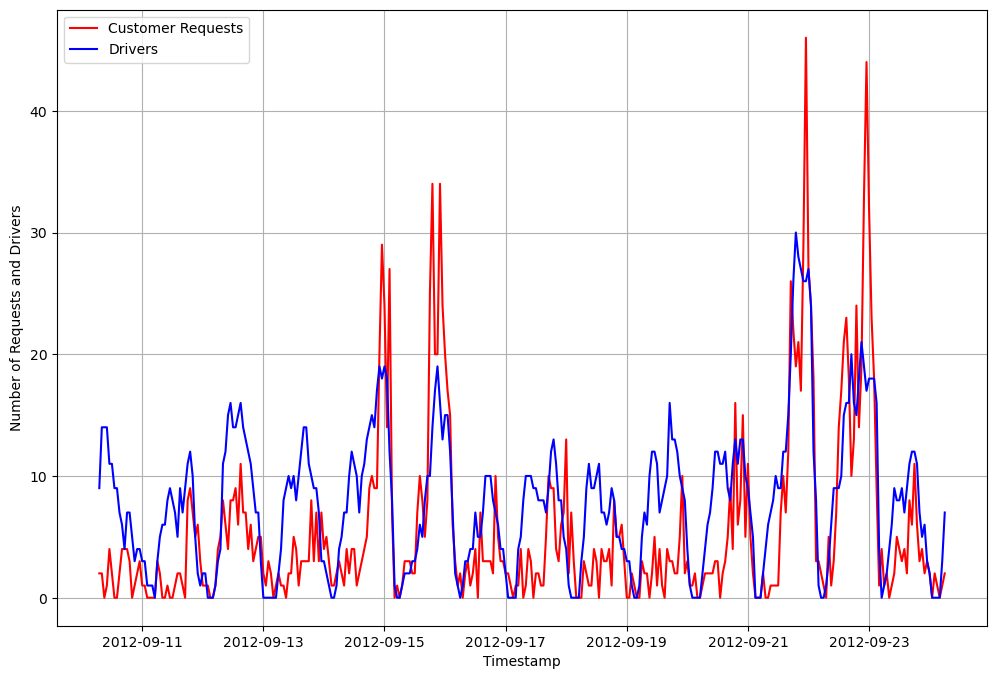

In [26]:
# Draw a lineplot for each requests for the demand and the number of drivers per timestamp. 
plt.figure(figsize=(12,8))
sns.lineplot(data=df_reindex, x='Timestamp', y='Requests', color='red', label='Customer Requests')
sns.lineplot(data=df_reindex, x='Timestamp', y='Drivers', color='blue', label='Drivers')
plt.ylabel('Number of Requests and Drivers')
plt.legend()
plt.grid(True)

From the above plot, generally the number of drivers seems to be increasing when the demand of requests increases. But when we look closer there are opposite movements between the number of requests and drivers. 

### Question 8

<b>In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?</b>

In [27]:
# Sort values by the descending order of timestamp. 
# Then get the rolling sum of the 72 hours window. 
# To drop the unnecessary rows and columns, we drop `completed trip per driver` since all values are nan. 
# Also drop the other rows that contain nan values
df_descending = df_drop_date.sort_values(by='Timestamp', ascending=False)
df_agg_3days = df_descending.rolling(72).sum().drop(columns=['completed trip per driver']).dropna().sort_values(by='Timestamp').reset_index()

# Create a time interval
df_agg_3days['Time Interval'] = df_agg_3days['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S') + ' - ' + (df_agg_3days['Timestamp'] + pd.Timedelta('72h')).dt.strftime('%Y-%m-%d %H:%M:%S')

# Calculate the ratio of zeroes (No car found) per eyeballs (Opened app)
df_agg_3days['zeroes per eyeballs'] = df_agg_3days['No Car Found'] / df_agg_3days['Opened App']
highest_ratio = df_agg_3days.nlargest(1, 'zeroes per eyeballs')['Time Interval']
print(f"72 hour period with the highest ratio of Zeroes to Eyeballs: {highest_ratio.iloc[0]}")


72 hour period with the highest ratio of Zeroes to Eyeballs: 2012-09-15 05:00:00 - 2012-09-18 05:00:00


### Question 9

<b>If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? </b>

Hint: Consider both rider eyeballs and driver supply when choosing

In [28]:
# Group by time
df_grouped_time = df_drop_date.groupby('Time').sum().reset_index()

# Get the difference between the number of app being opened and the number of drivers.
df_grouped_time['eyeball - driver'] = df_grouped_time['No Car Found'] - df_grouped_time['Drivers']

# Get the highest row that has the difference between the number of app being opened and the number of drivers
# since it means there are the least drivers during that time. 
df_grouped_time.nlargest(1, 'eyeball - driver')

,Time,Opened App,No Car Found,Trip Completed,Requests,Drivers,dayofweek,completed trip per driver,eyeball - driver
23,23,488,193,126,184,119,42,11.269306,74


In [29]:
driver_to_add_hr = df_grouped_time.nlargest(1, 'eyeball - driver')['Time'].iloc[0]
print(f"Hour to add 5 drivers: {driver_to_add_hr}")

Hour to add 5 drivers: 23


### Question 10

<b>True or False: There is exactly two weeks of data in this analysis</b>

In [30]:
df_reindex = df.reset_index()

# Check the time difference between the first and the end of the timestamp
df_reindex['Timestamp'][df_reindex.shape[0]-1] - df_reindex['Timestamp'][0]

Timedelta('13 days 23:00:00')

In [31]:
# Check if the timedelta for 14 days and the df timestamp timedelta is the same
pd.Timedelta('14d') == df_reindex['Timestamp'][df_reindex.shape[0]-1] - df_reindex['Timestamp'][0]

False

Timedelta for 14 days and our dataset doesn't match, meaning 'There is exactly two weeks of data in this analysis' is `False`

### Question 11

<b>Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums) </b>

Tip: Visualize the data to confirm your answer if needed.

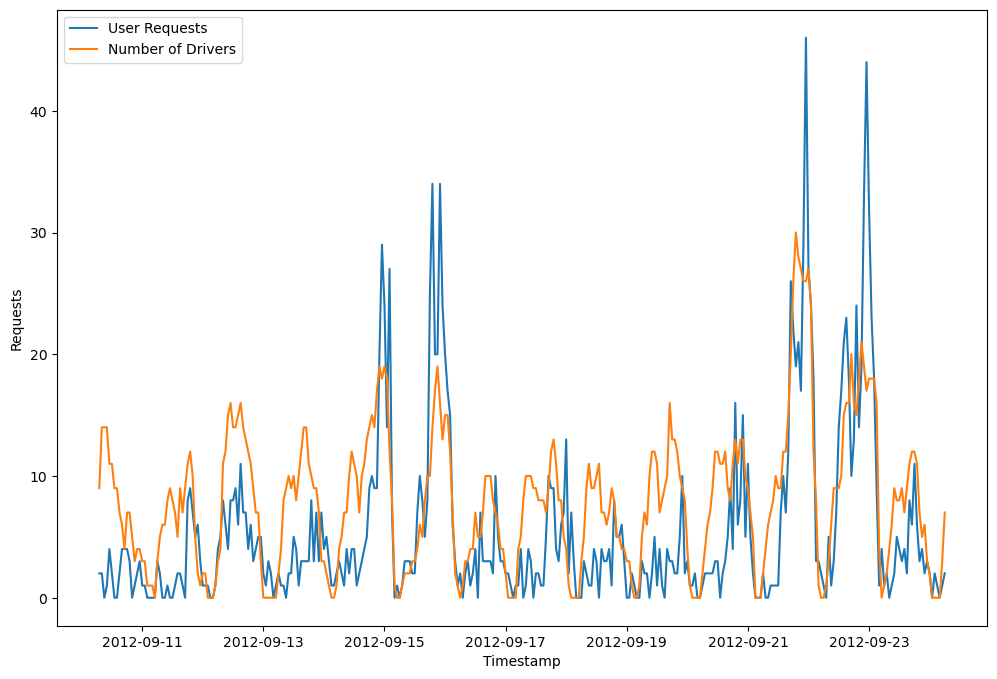

In [32]:
# Plot the requests and drivers graph to see the trend
plt.figure(figsize=(12,8))
sns.lineplot(data=df_reindex, x='Timestamp', y='Requests', label='User Requests')
sns.lineplot(data=df_reindex, x='Timestamp', y='Drivers', label='Number of Drivers')
plt.legend()
plt.show()

We can see there are points where the customer requests for cars and the number of drivers are flattened to 0.

In [33]:
# Get the point where both requests and drivers are 0
df_request_driver_min = df_reindex[(df_reindex['Requests'] == 0) & (df_reindex['Drivers'] == 0)]

# Group by time and count the number of date
df_group_date = df_request_driver_min.groupby('Time')['Date'].count()
df_group_date

Time
1    1
3    3
4    7
5    4
6    1
Name: Date, dtype: int64

In [34]:
# Get the most frequently appearing hour
most_frequent_min_hour = df_group_date.nlargest(1).index[0]
most_frequent_min_hour

4

In [35]:
print(f"True end day: {most_frequent_min_hour} am")

True end day: 4 am
